In [2]:
! pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=7a81ee3ffa2178cd10b08829938df0857a9f6144452c016f92d0f500576b93a9
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [3]:
! pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


PLOTTING BOLLINGER BAND INDICATOR

<ipython-input-4-8a590b20845e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df.datetime)
<ipython-input-4-8a590b20845e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = df["datetime"].apply(mpl_dates.date2num)


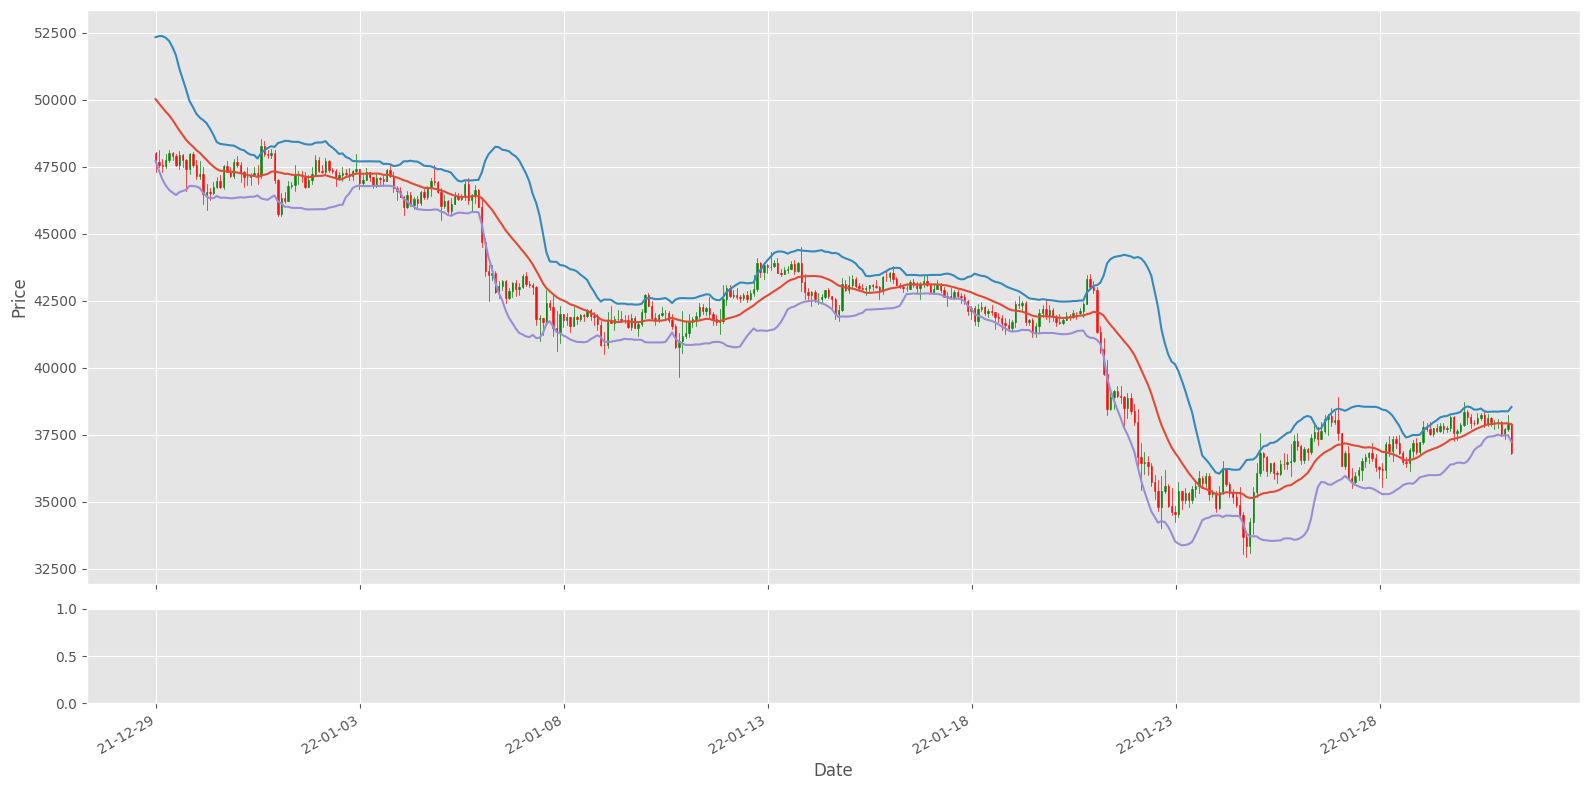

In [4]:
import pandas as pd
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

def Plot_OHCL(df, ax1_indicators=[], ax2_indicators=[]):
    df_original = df.copy()
    # necessary convert to datetime
    df["datetime"] = pd.to_datetime(df.datetime)
    df["datetime"] = df["datetime"].apply(mpl_dates.date2num)

    df = df[['datetime', 'open', 'high', 'low', 'close', 'volume']]

    # We are using the style ‘ggplot’
    plt.style.use('ggplot')

    # figsize attribute allows us to specify the width and height of a figure in unit inches
    fig = plt.figure(figsize=(16,8))

    # Create top subplot for price axis
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)

    # Create bottom subplot for volume which shares its x-axis
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

    candlestick_ohlc(ax1, df.values, width=0.8/24, colorup='green', colordown='red', alpha=0.8)
    ax1.set_ylabel('Price', fontsize=12)
    plt.xlabel('Date')
    plt.xticks(rotation=45)

    # plot all ax1 indicators
    for indicator in ax1_indicators:
        ax1.plot(df["datetime"], df_original[indicator],'-')

    # plot all ax2 indicators
    for indicator in ax2_indicators:
        ax2.plot(df["datetime"], df_original[indicator],'-')

    # beautify the x-labels (Our Date format)
    ax1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%y-%m-%d'))
    fig.autofmt_xdate()
    fig.tight_layout()

    plt.show()

def AddIndicators(df):
    # Add Bollinger Bands indicator
    indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    return df

if __name__ == "__main__":
    df = pd.read_csv('/content/btc_2h (1).csv')
    df = df.sort_values('datetime')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Bollinger Bands
    Plot_OHCL(test_df, ax1_indicators=["bb_bbm", "bb_bbh", "bb_bbl"])

PLOTTING ALL THE INDICATORS

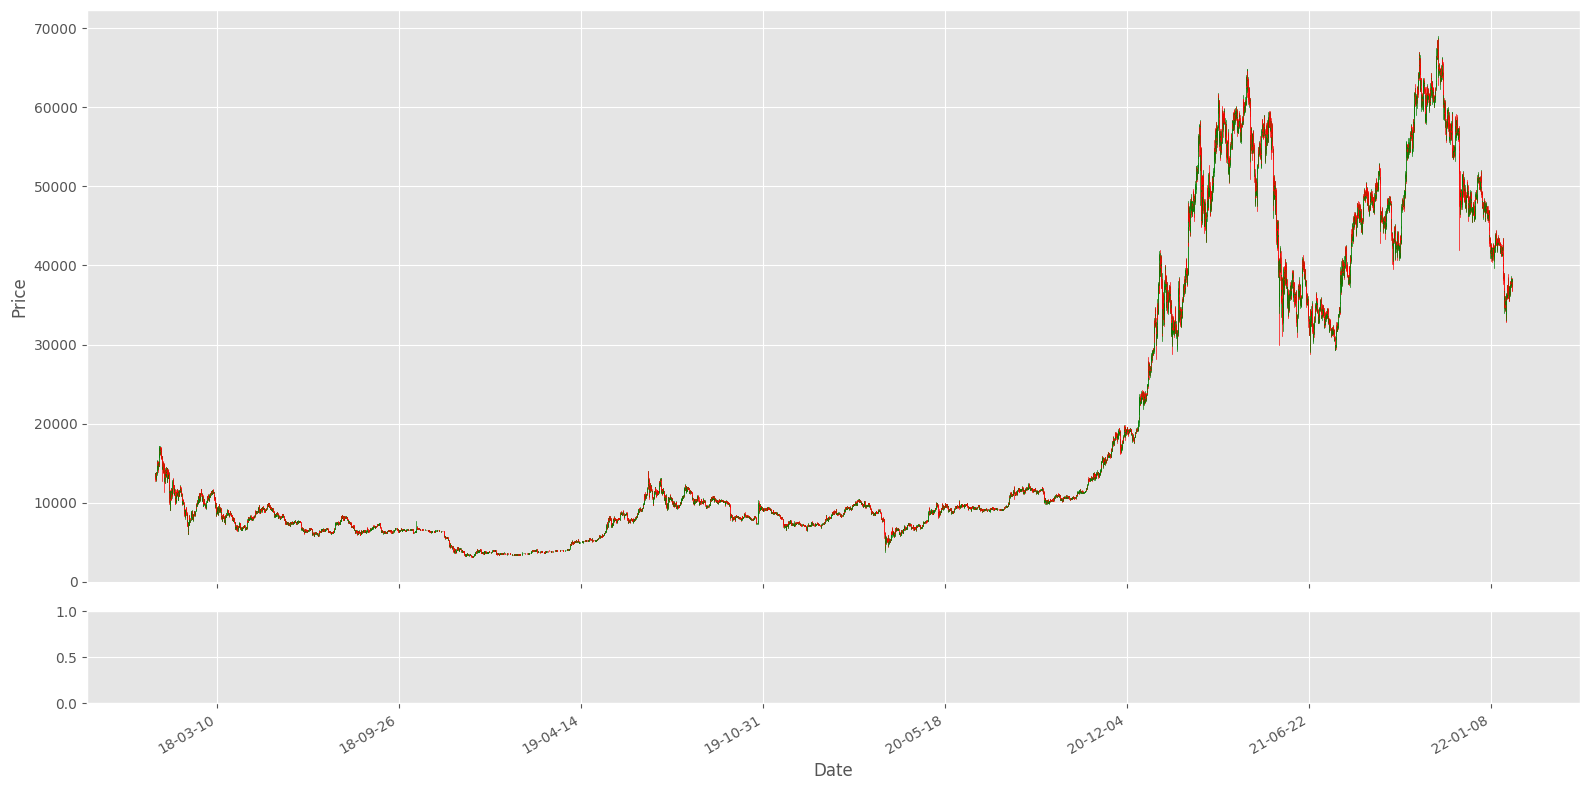

In [5]:
import pandas as pd
from ta.trend import SMAIndicator, macd, PSARIndicator
from ta.volatility import BollingerBands
from ta.momentum import rsi


def AddIndicators(df):
    # Add Simple Moving Average (SMA) indicators
    df["sma7"] = SMAIndicator(close=df["close"], window=7, fillna=True).sma_indicator()
    df["sma25"] = SMAIndicator(close=df["close"], window=25, fillna=True).sma_indicator()
    df["sma99"] = SMAIndicator(close=df["close"], window=99, fillna=True).sma_indicator()

    # Add Bollinger Bands indicator
    indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    # Add Parabolic Stop and Reverse (Parabolic SAR) indicator
    indicator_psar = PSARIndicator(high=df["high"], low=df["low"], close=df["close"], step=0.02, max_step=2, fillna=True)
    df['psar'] = indicator_psar.psar()

    # Add Moving Average Convergence Divergence (MACD) indicator
    df["MACD"] = macd(close=df["close"], window_slow=26, window_fast=12, fillna=True) # mazas

    # Add Relative Strength Index (RSI) indicator
    df["RSI"] = rsi(close=df["close"], window=14, fillna=True) # mazas

    return df

if __name__ == "__main__":
    df = pd.read_csv('/content/btc_2h (1).csv')
    df = df.sort_values('datetime')
    df = AddIndicators(df)

    test_df = df[-400:]

    Plot_OHCL(df)

In [6]:
! pip install tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.8 MB/s eta 0:00:00


In [7]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series

PREDICTING CLOSE VALUE

Epoch 1/20
268/268 [==============================] - 10s 23ms/step - loss: 8.9845e-04
Epoch 2/20
268/268 [==============================] - 5s 18ms/step - loss: 6.5697e-04
Epoch 3/20
268/268 [==============================] - 5s 20ms/step - loss: 0.0011
Epoch 4/20
268/268 [==============================] - 6s 22ms/step - loss: 0.0015
Epoch 5/20
268/268 [==============================] - 5s 18ms/step - loss: 0.0031
Epoch 6/20
268/268 [==============================] - 6s 23ms/step - loss: 0.0051
Epoch 7/20
268/268 [==============================] - 5s 20ms/step - loss: 0.0031
Epoch 8/20
268/268 [==============================] - 5s 20ms/step - loss: 0.0014
Epoch 9/20
268/268 [==============================] - 6s 22ms/step - loss: 3.8340e-04
Epoch 10/20
268/268 [==============================] - 5s 18ms/step - loss: 8.0903e-05
Epoch 11/20
268/268 [==============================] - 6s 23ms/step - loss: 1.0763e-04
Epoch 12/20
268/268 [==============================] - 5s 18ms/step - loss:

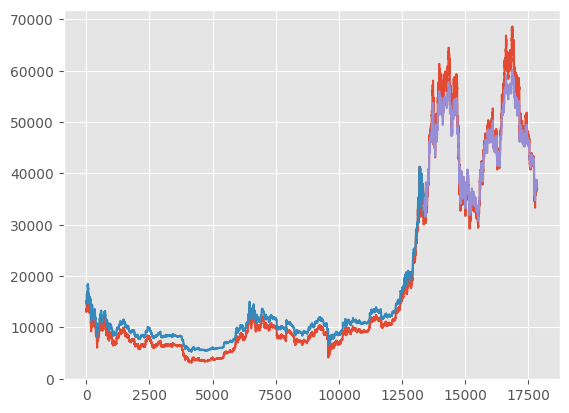

In [10]:
data=pd.read_csv('/content/btc_2h (1).csv')
data=data.set_index(pd.DatetimeIndex(data['datetime']))['close']

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(0)
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back=3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))
import keras
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, verbose=1,shuffle=False,batch_size=50)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#data=pd.DataFrame(numpy.concatenate((trainPredict[0:len(trainPredict)-look_back-1],testPredict[0:len(testPredict)-look_back-1])),columns=["predicted"])
#print('one',data.count())
#print('two',dataframe.count())
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

#return ans,[look_back,trainScore,testScore]

    # shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [11]:
tes = pd.DataFrame(testPredictPlot, columns=['close'])
trai = pd.DataFrame(trainPredictPlot, columns=['close'])

PREDICTING OPEN VALUE

Epoch 1/20
268/268 [==============================] - 12s 29ms/step - loss: 9.2390e-04
Epoch 2/20
268/268 [==============================] - 7s 25ms/step - loss: 6.8009e-04
Epoch 3/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0013
Epoch 4/20
268/268 [==============================] - 8s 29ms/step - loss: 0.0018
Epoch 5/20
268/268 [==============================] - 8s 30ms/step - loss: 0.0031
Epoch 6/20
268/268 [==============================] - 8s 30ms/step - loss: 0.0049
Epoch 7/20
268/268 [==============================] - 7s 26ms/step - loss: 0.0023
Epoch 8/20
268/268 [==============================] - 7s 28ms/step - loss: 0.0011
Epoch 9/20
268/268 [==============================] - 7s 27ms/step - loss: 1.5954e-04
Epoch 10/20
268/268 [==============================] - 8s 32ms/step - loss: 8.4014e-05
Epoch 11/20
268/268 [==============================] - 9s 33ms/step - loss: 9.9004e-05
Epoch 12/20
268/268 [==============================] - 5s 19ms/step - loss:

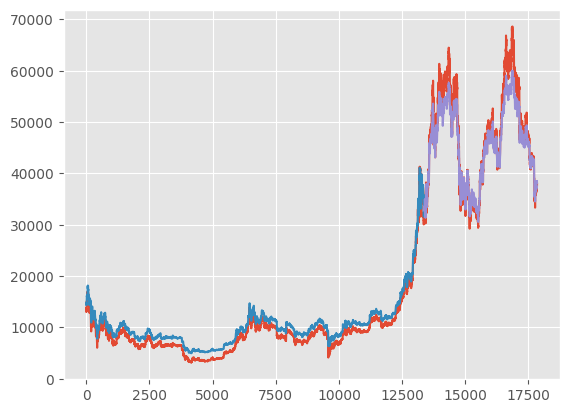

In [12]:
data=pd.read_csv('/content/btc_2h (1).csv')
data=data.set_index(pd.DatetimeIndex(data['datetime']))['open']

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(0)
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back=3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))
import keras
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, verbose=1,shuffle=False,batch_size=50)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#data=pd.DataFrame(numpy.concatenate((trainPredict[0:len(trainPredict)-look_back-1],testPredict[0:len(testPredict)-look_back-1])),columns=["predicted"])
#print('one',data.count())
#print('two',dataframe.count())
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

#return ans,[look_back,trainScore,testScore]

    # shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [13]:
tes['open'] = pd.DataFrame(testPredictPlot, columns=['open'])
trai['open'] = pd.DataFrame(trainPredictPlot, columns=['open'])

PREDICTING HIGH VALUE

Epoch 1/20
268/268 [==============================] - 9s 20ms/step - loss: 9.1448e-04
Epoch 2/20
268/268 [==============================] - 6s 23ms/step - loss: 6.4667e-04
Epoch 3/20
268/268 [==============================] - 5s 20ms/step - loss: 0.0013
Epoch 4/20
268/268 [==============================] - 6s 21ms/step - loss: 0.0020
Epoch 5/20
268/268 [==============================] - 5s 20ms/step - loss: 0.0031
Epoch 6/20
268/268 [==============================] - 5s 18ms/step - loss: 0.0048
Epoch 7/20
268/268 [==============================] - 6s 23ms/step - loss: 0.0025
Epoch 8/20
268/268 [==============================] - 5s 18ms/step - loss: 0.0012
Epoch 9/20
268/268 [==============================] - 6s 21ms/step - loss: 1.9553e-04
Epoch 10/20
268/268 [==============================] - 6s 21ms/step - loss: 7.7258e-05
Epoch 11/20
268/268 [==============================] - 5s 18ms/step - loss: 9.9606e-05
Epoch 12/20
268/268 [==============================] - 6s 23ms/step - loss: 

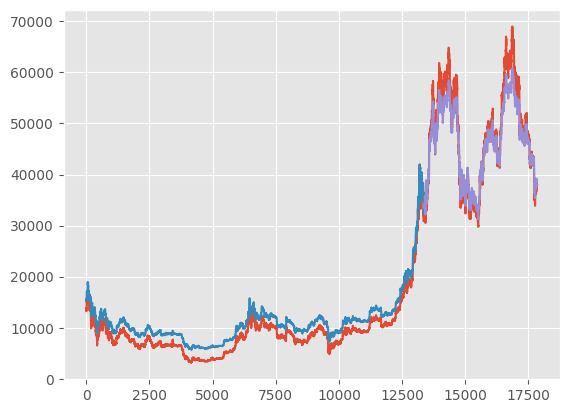

In [14]:
data=pd.read_csv('/content/btc_2h (1).csv')
data=data.set_index(pd.DatetimeIndex(data['datetime']))['high']

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(0)
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back=3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))
import keras
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, verbose=1,shuffle=False,batch_size=50)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#data=pd.DataFrame(numpy.concatenate((trainPredict[0:len(trainPredict)-look_back-1],testPredict[0:len(testPredict)-look_back-1])),columns=["predicted"])
#print('one',data.count())
#print('two',dataframe.count())
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

#return ans,[look_back,trainScore,testScore]

    # shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [15]:
tes['high'] = pd.DataFrame(testPredictPlot, columns=['high'])
trai['high'] = pd.DataFrame(trainPredictPlot, columns=['high'])

PREDICTING LOW VALUE

Epoch 1/20
268/268 [==============================] - 10s 19ms/step - loss: 9.0412e-04
Epoch 2/20
268/268 [==============================] - 6s 23ms/step - loss: 6.8268e-04
Epoch 3/20
268/268 [==============================] - 5s 19ms/step - loss: 0.0011
Epoch 4/20
268/268 [==============================] - 5s 19ms/step - loss: 0.0017
Epoch 5/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0041
Epoch 6/20
268/268 [==============================] - 5s 19ms/step - loss: 0.0041
Epoch 7/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0018
Epoch 8/20
268/268 [==============================] - 5s 19ms/step - loss: 8.4580e-04
Epoch 9/20
268/268 [==============================] - 5s 20ms/step - loss: 1.2260e-04
Epoch 10/20
268/268 [==============================] - 6s 23ms/step - loss: 9.4868e-05
Epoch 11/20
268/268 [==============================] - 5s 20ms/step - loss: 9.6941e-05
Epoch 12/20
268/268 [==============================] - 7s 25ms/step - l

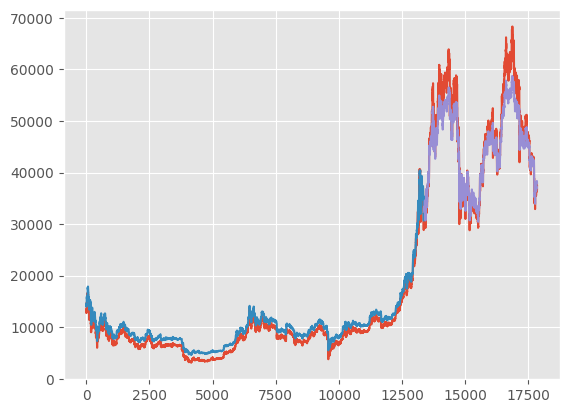

In [16]:
data=pd.read_csv('/content/btc_2h (1).csv')
data=data.set_index(pd.DatetimeIndex(data['datetime']))['low']

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(0)
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back=3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))
import keras
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, verbose=1,shuffle=False,batch_size=50)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#data=pd.DataFrame(numpy.concatenate((trainPredict[0:len(trainPredict)-look_back-1],testPredict[0:len(testPredict)-look_back-1])),columns=["predicted"])
#print('one',data.count())
#print('two',dataframe.count())
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

#return ans,[look_back,trainScore,testScore]

    # shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [17]:
tes['low'] = pd.DataFrame(testPredictPlot, columns=['low'])
trai['low'] = pd.DataFrame(trainPredictPlot, columns=['low'])

PREDICTING VOLUME

Epoch 1/20
268/268 [==============================] - 11s 26ms/step - loss: 0.0017
Epoch 2/20
268/268 [==============================] - 6s 22ms/step - loss: 0.0016
Epoch 3/20
268/268 [==============================] - 5s 19ms/step - loss: 0.0016
Epoch 4/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0016
Epoch 5/20
268/268 [==============================] - 5s 19ms/step - loss: 0.0016
Epoch 6/20
268/268 [==============================] - 6s 21ms/step - loss: 0.0016
Epoch 7/20
268/268 [==============================] - 6s 21ms/step - loss: 0.0016
Epoch 8/20
268/268 [==============================] - 5s 19ms/step - loss: 0.0016
Epoch 9/20
268/268 [==============================] - 6s 24ms/step - loss: 0.0016
Epoch 10/20
268/268 [==============================] - 5s 19ms/step - loss: 0.0016
Epoch 11/20
268/268 [==============================] - 6s 21ms/step - loss: 0.0016
Epoch 12/20
268/268 [==============================] - 6s 21ms/step - loss: 0.0016
Epoch 13/20


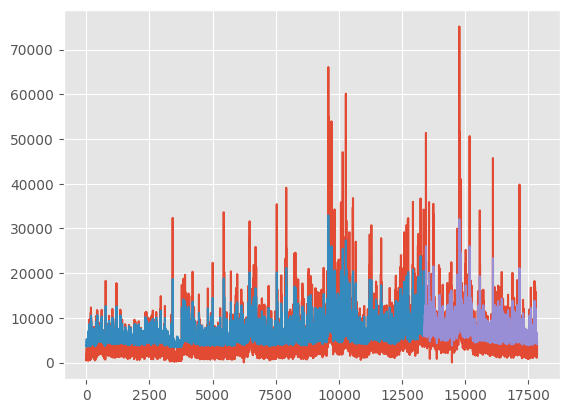

In [18]:
data=pd.read_csv('/content/btc_2h (1).csv')
data=data.set_index(pd.DatetimeIndex(data['datetime']))['volume']

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(0)
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back=3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))
import keras
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, verbose=1,shuffle=False,batch_size=50)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#data=pd.DataFrame(numpy.concatenate((trainPredict[0:len(trainPredict)-look_back-1],testPredict[0:len(testPredict)-look_back-1])),columns=["predicted"])
#print('one',data.count())
#print('two',dataframe.count())
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

#return ans,[look_back,trainScore,testScore]

    # shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
tes['volume'] = pd.DataFrame(testPredictPlot, columns=['volume'])
trai['volume'] = pd.DataFrame(trainPredictPlot, columns=['volume'])

In [20]:
data=pd.read_csv('/content/btc_2h (1).csv')
tes['datetime'] = data['datetime']
trai['datetime'] = data['datetime']

In [21]:
tes=tes.dropna()

In [22]:
trai=trai.dropna()

<ipython-input-23-e54ea10a74ee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df.datetime)
<ipython-input-23-e54ea10a74ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = df["datetime"].apply(mpl_dates.date2num)


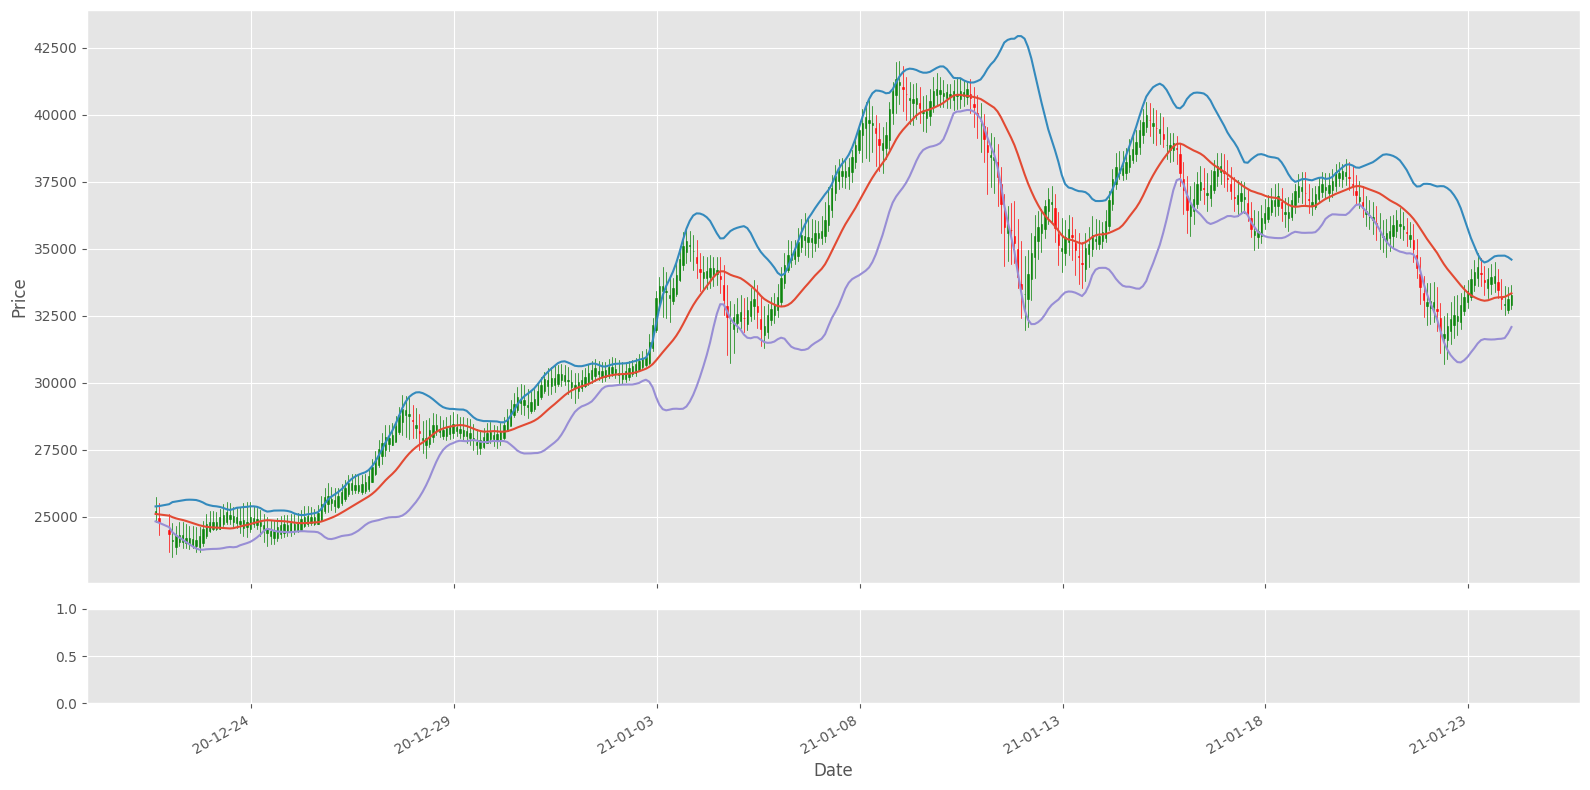

In [23]:
import pandas as pd
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

def Plot_OHCL(df, ax1_indicators=[], ax2_indicators=[]):
    df_original = df.copy()
    # necessary convert to datetime
    df["datetime"] = pd.to_datetime(df.datetime)
    df["datetime"] = df["datetime"].apply(mpl_dates.date2num)

    df = df[['datetime', 'open', 'high', 'low', 'close', 'volume']]

    # We are using the style ‘ggplot’
    plt.style.use('ggplot')

    # figsize attribute allows us to specify the width and height of a figure in unit inches
    fig = plt.figure(figsize=(16,8))

    # Create top subplot for price axis
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)

    # Create bottom subplot for volume which shares its x-axis
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

    candlestick_ohlc(ax1, df.values, width=0.8/24, colorup='green', colordown='red', alpha=0.8)
    ax1.set_ylabel('Price', fontsize=12)
    plt.xlabel('Date')
    plt.xticks(rotation=45)

    # plot all ax1 indicators
    for indicator in ax1_indicators:
        ax1.plot(df["datetime"], df_original[indicator],'-')

    # plot all ax2 indicators
    for indicator in ax2_indicators:
        ax2.plot(df["datetime"], df_original[indicator],'-')

    # beautify the x-labels (Our Date format)
    ax1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%y-%m-%d'))
    fig.autofmt_xdate()
    fig.tight_layout()

    plt.show()

def AddIndicators(df):
    # Add Bollinger Bands indicator
    indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    return df


if __name__ == "__main__":
    # df = pd.read_csv('/content/btc_2h (1).csv')
    df=trai
    df = df.sort_values('datetime')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Bollinger Bands
    Plot_OHCL(test_df, ax1_indicators=["bb_bbm", "bb_bbh", "bb_bbl"])

<ipython-input-24-e1ab9d3f6435>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df.datetime)
<ipython-input-24-e1ab9d3f6435>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = df["datetime"].apply(mpl_dates.date2num)


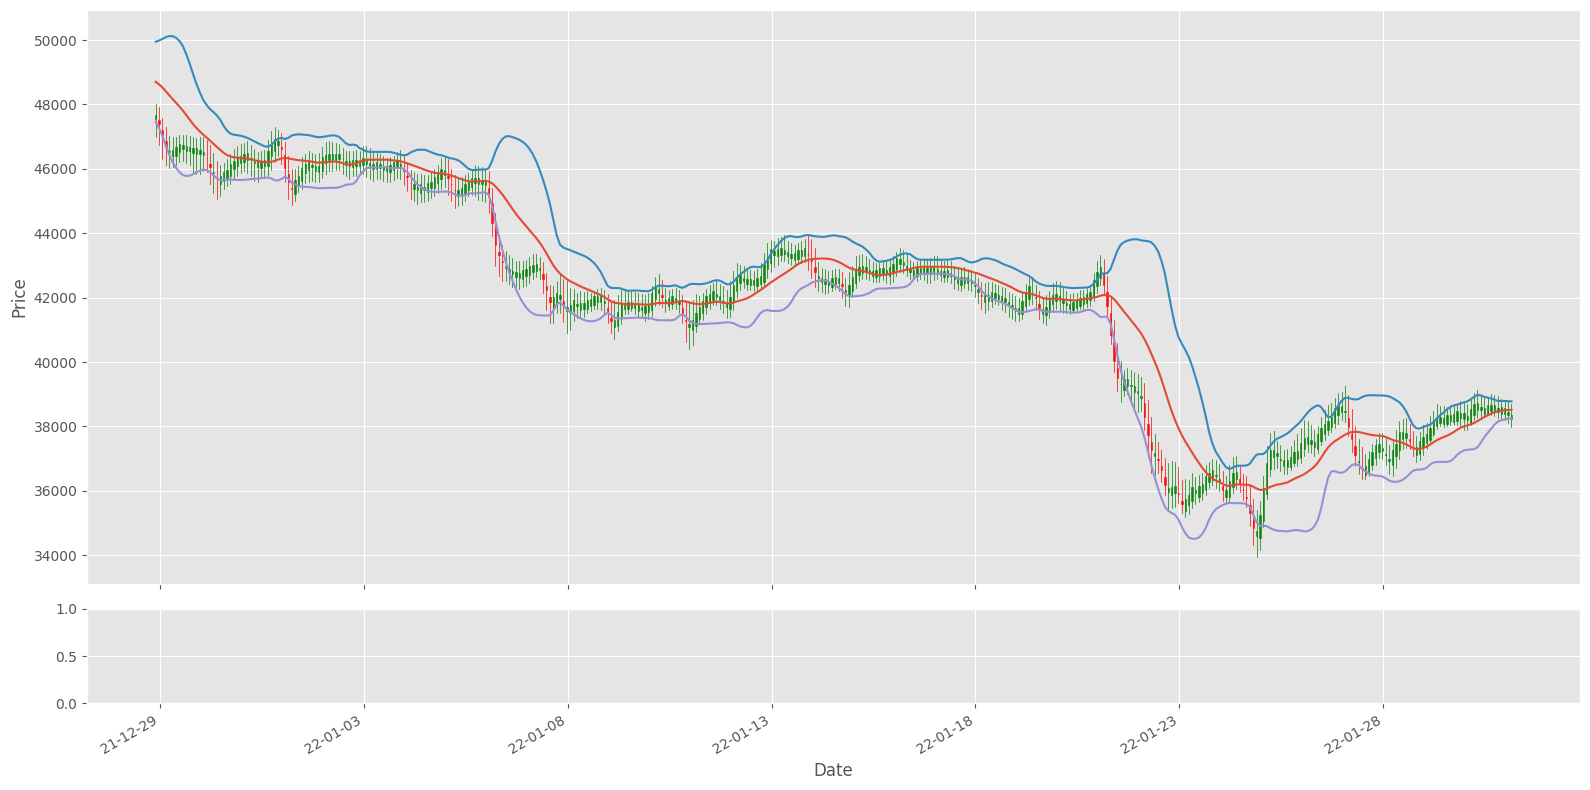

In [24]:
import pandas as pd
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

def Plot_OHCL(df, ax1_indicators=[], ax2_indicators=[]):
    df_original = df.copy()
    # necessary convert to datetime
    df["datetime"] = pd.to_datetime(df.datetime)
    df["datetime"] = df["datetime"].apply(mpl_dates.date2num)

    df = df[['datetime', 'open', 'high', 'low', 'close', 'volume']]

    # We are using the style ‘ggplot’
    plt.style.use('ggplot')

    # figsize attribute allows us to specify the width and height of a figure in unit inches
    fig = plt.figure(figsize=(16,8))

    # Create top subplot for price axis
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)

    # Create bottom subplot for volume which shares its x-axis
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

    candlestick_ohlc(ax1, df.values, width=0.8/24, colorup='green', colordown='red', alpha=0.8)
    ax1.set_ylabel('Price', fontsize=12)
    plt.xlabel('Date')
    plt.xticks(rotation=45)

    # plot all ax1 indicators
    for indicator in ax1_indicators:
        ax1.plot(df["datetime"], df_original[indicator],'-')

    # plot all ax2 indicators
    for indicator in ax2_indicators:
        ax2.plot(df["datetime"], df_original[indicator],'-')

    # beautify the x-labels (Our Date format)
    ax1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%y-%m-%d'))
    fig.autofmt_xdate()
    fig.tight_layout()

    plt.show()

def AddIndicators(df):
    # Add Bollinger Bands indicator
    indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    return df

if __name__ == "__main__":
    # df = pd.read_csv('/content/btc_2h (1).csv')
    df=tes
    df = df.sort_values('datetime')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Bollinger Bands
    Plot_OHCL(test_df, ax1_indicators=["bb_bbm", "bb_bbh", "bb_bbl"])

RISK MANAGEMENT

In [28]:
class LSTMRiskManagement:
    def __init__(self, initial_capital, risk_per_trade=0.02, max_drawdown=0.1, reward_to_risk_ratio=2):
        self.initial_capital = initial_capital
        self.current_capital = initial_capital
        self.risk_per_trade = risk_per_trade
        self.max_drawdown = max_drawdown
        self.reward_to_risk_ratio = reward_to_risk_ratio
        self.current_position_size = 0.0

    def calculate_position_size(self, lstm_signal, current_price):
        if lstm_signal == 1:
            risk_amount = self.current_capital * self.risk_per_trade
            potential_profit = risk_amount * self.reward_to_risk_ratio
            self.current_position_size = potential_profit / current_price

    def update_capital(self, lstm_signal, current_price, annual_returns):
        if lstm_signal == 1:
            trade_cost = self.current_position_size * current_price
            self.current_capital -= trade_cost
        elif lstm_signal == -1:
            trade_revenue = self.current_position_size * current_price
            self.current_capital += trade_revenue

        drawdown = (self.initial_capital - self.current_capital) / self.initial_capital

        # Dynamic adjustment based on average annual returns
        if annual_returns >= 600:
            self.risk_per_trade = 0.03  # Example: Increase risk for high returns
        elif annual_returns >= 450:
            self.risk_per_trade = 0.025
        elif annual_returns >= 300:
            self.risk_per_trade = 0.02
        elif annual_returns >= 150:
            self.risk_per_trade = 0.015
        else:
            self.risk_per_trade = 0.01  # Example: Lower risk for lower returns

        # Dynamic adjustment based on maximum drawdowns
        if drawdown > 0.08:
            self.risk_per_trade *= 0.5  # Reduce risk per trade to half for high drawdowns

        self.calculate_position_size(lstm_signal, current_price)

        return drawdown


In [29]:
df=tes

In [65]:
import numpy as np

def calculate_metrics(df, signals, total_capital, risk_free_rate=0.0):
    # Initialize variables for metrics
    total_trades = len(signals)
    gross_profit = 0
    gross_loss = 0
    net_profit = 0
    winning_trades = 0
    losing_trades = 0
    largest_winning_trade = 0
    largest_losing_trade = 0
    cumulative_profit = 0
    cumulative_loss = 0
    holding_duration = []  # List to store holding durations for each trade

    # Variables for max drawdown calculation
    max_peak = -float('inf')
    current_peak = -float('inf')
    max_drawdown = 0

    # Variables for Sharpe and Sortino Ratios
    returns = []

    close_prices = df['close'].values

    # Loop through signals and calculate metrics
    for i in range(total_trades):
        if i + 1 < total_trades:
            entry_price = close_prices[i]
            exit_price = close_prices[i + 1]
            signal = signals[i]

            # Calculate trade profit/loss
            trade_profit_loss = (exit_price - entry_price) * signal

            # Update gross profit and loss
            if trade_profit_loss > 0:
                gross_profit += trade_profit_loss
                winning_trades += 1
                largest_winning_trade = max(largest_winning_trade, trade_profit_loss)
            else:
                gross_loss += abs(trade_profit_loss)
                losing_trades += 1
                largest_losing_trade = max(largest_losing_trade, abs(trade_profit_loss))

            # Update cumulative profit and loss
            cumulative_profit += max(trade_profit_loss, 0)
            cumulative_loss += max(-trade_profit_loss, 0)

            # Update holding duration
            holding_duration.append(1)

            # Update max drawdown
            current_peak = max(current_peak, cumulative_profit - cumulative_loss)
            max_peak = max(max_peak, current_peak)
            drawdown = ((max_peak - (cumulative_profit - cumulative_loss)) / max_peak)/(np.sqrt(12))
            max_drawdown = max(max_drawdown, drawdown)

            # Update returns for Sharpe and Sortino Ratios
            returns.append(trade_profit_loss)

    # Calculate net profit
    net_profit = cumulative_profit - cumulative_loss - 0.0015 * total_capital

    # Calculate additional metrics as needed
    win_rate = winning_trades / total_trades if total_trades > 0 else 0.0
    average_holding_duration = np.mean(holding_duration) if holding_duration else 0.0

    # Calculate Sharpe Ratio
    sharpe_ratio = np.sqrt(12) * np.mean(np.array(returns) - risk_free_rate) / np.std(np.array(returns))

    # Calculate Sortino Ratio
    downside_returns = np.minimum(returns, 0)
    sortino_ratio = np.sqrt(12) * np.mean(np.array(returns) - risk_free_rate) / np.std(downside_returns)

    # Print or return the calculated metrics
    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate * 100:.2f}%")
    print(f"Gross Profit: {gross_profit}")
    print(f"Gross Loss: {gross_loss}")
    print(f"Net Profit: {net_profit}")
    print(f"Largest Winning Trade: {largest_winning_trade}")
    print(f"Largest Losing Trade: {largest_losing_trade}")
    print(f"Average Holding Duration: {average_holding_duration:.2f}")
    print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"Sortino Ratio: {sortino_ratio:.4f}")





In [68]:
df['sma7'] = df['close'].rolling(2).mean()
df['sma25']= df['close'].rolling(1).mean()
def generate_signals(df, lstm_predictions_col='LSTM_Predictions', risk_management=None):
    signals = []
    for index, row in df.iterrows():
        lstm_signal = 1 if row['close'] > 0.0 else -1 if row['close'] < 0.0 else 0
        indicator_signals = 1 if row['sma25'] > row['sma7'] else -1 if row['sma25'] < row['sma7'] else 0
        combined_signal = lstm_signal * indicator_signals


        signals.append(combined_signal)

    # sig = signals
    return signals

if __name__ == "__main__":

    df = df.sort_values('datetime')
    df = AddIndicators(df)

    lstm_risk_management = LSTMRiskManagement(initial_capital=100000)



    sig = generate_signals(df, lstm_predictions_col='LSTM_Predictions', risk_management=lstm_risk_management)


calculate_metrics(df, sig,100000)


Total Trades: 4457
Win Rate: 70.27%
Gross Profit: 630536.533203125
Gross Loss: 133606.541015625
Net Profit: 496779.9921875
Largest Winning Trade: 1806.30078125
Largest Losing Trade: 1158.15234375
Average Holding Duration: 2228.50
Maximum Holding Duration: 4456
Maximum Drawdown: 6.91%
Sharpe Ratio: 1.7572
Sortino Ratio: 5.1933


invalid value encountered in double_scalars
